<a href="https://colab.research.google.com/github/ET-TOURI/AI/blob/main/aptos2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/aptos2019-kaggle"
%cd /content/drive/MyDrive/aptos2019-kaggle/
#For Normal dataset : --unzip for unzip file and remove the origin
#!kaggle datasets download -d aptos2019-blindness-detection --unzip

#For Competition dataset
!kaggle competitions download -c aptos2019-blindness-detection
import zipfile
for file in os.listdir():
    if file.endswith(".zip"):
        with zipfile.ZipFile(file, "r") as zip_file:
            zip_file.extractall()
        os.remove(file)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/aptos2019-kaggle
100% 9.50G/9.51G [02:25<00:00, 68.3MB/s]
100% 9.51G/9.51G [02:25<00:00, 70.1MB/s]


<Axes: xlabel='diagnosis', ylabel='count'>

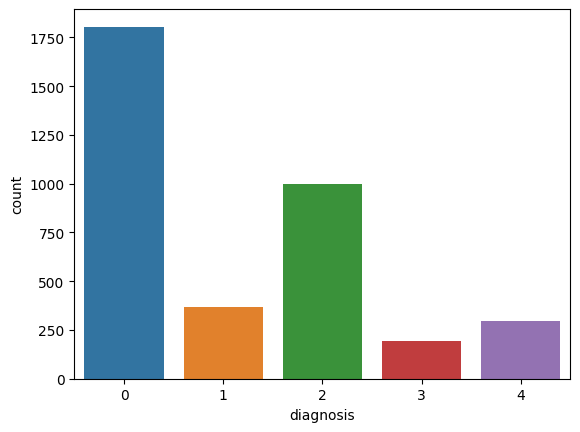

In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sbn

data_path  = '/content/drive/MyDrive/aptos2019-kaggle'
data_train = pd.read_csv('/content/drive/MyDrive/aptos2019-kaggle/train.csv')
data_test  = pd.read_csv('/content/drive/MyDrive/aptos2019-kaggle/test.csv')

sbn.countplot(x = 'diagnosis', data = data_train)

'RGB'

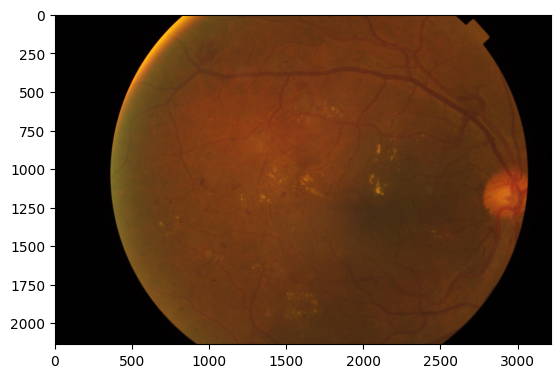

In [8]:
from PIL import Image
image = Image.open(data_path+"/train_images/000c1434d8d7.png")
plt.imshow(image)
image.mode

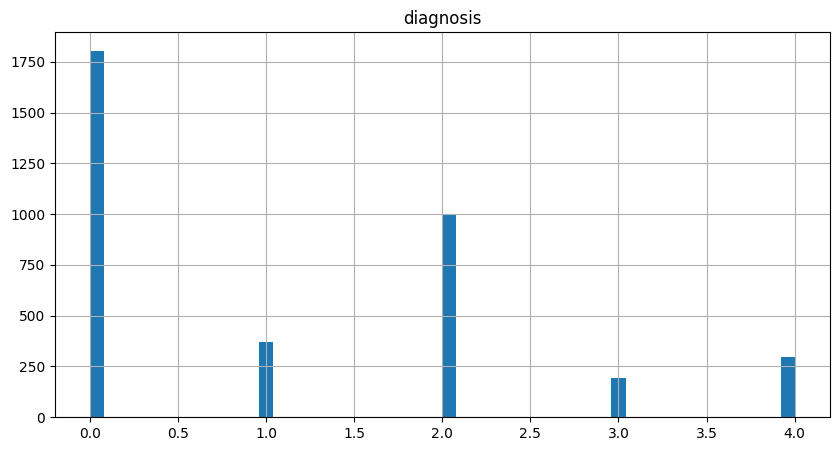

In [9]:
data_train.hist(bins=50,figsize=(10,5))
plt.show()

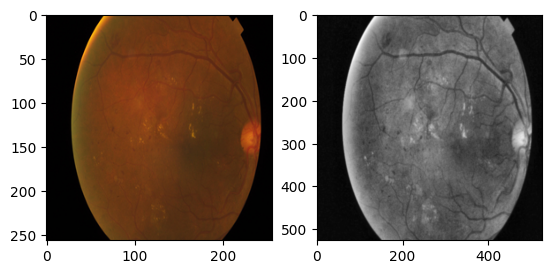

In [15]:
# Data Pre-processing test
import cv2 as cv
from scipy.ndimage import gaussian_filter

img_path = data_path+"/train_images/000c1434d8d7.png"
# Reading the image from the present directory
image = Image.open(img_path)
image = image.resize((256, 256), Image.Resampling.LANCZOS)
image_cv = cv.imread(img_path, cv.IMREAD_COLOR)

# Resizing the image for compatibility
image_cv = cv.resize(image_cv, (526, 526))

# The initial processing of the image
# image = cv.medianBlur(image, 3)
image_bw = cv.cvtColor(image_cv, cv.COLOR_RGB2GRAY)

#Normalization
image_normalized = cv.normalize(image_bw, None, alpha=0, beta=200, norm_type=cv.NORM_MINMAX)

# The declaration of CLAHE
# clipLimit -> Threshold for contrast limiting
clahe = cv.createCLAHE(clipLimit=5)
image_clahe = clahe.apply(image_normalized) + 30

#gaussian_filter_data
final_image = gaussian_filter(image_clahe, sigma=1)

# Showing the two images
f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(image)
f.add_subplot(1,2, 2)
plt.imshow(final_image, cmap='gray')
plt.show(block=True)


In [25]:
from google.colab import drive
drive.mount('/content/drive')
import os

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sbn

import cv2 as cv
from PIL import Image
from scipy.ndimage import gaussian_filter
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical

from tqdm.notebook import tqdm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from keras.layers import AveragePooling2D
from keras.applications.resnet50 import ResNet50
from keras.layers import AveragePooling2D
from keras.models import Model
from keras.utils import plot_model
from keras.layers import Dense, Dropout, Flatten

# ResNet By Keras
base_model = ResNet50(weights = None, include_top=False, input_shape=(256, 256, 3))
# Add a new top layer
x = base_model.output
x = AveragePooling2D(pool_size=(4, 4))(x)
x = Flatten()(x)
x = Dropout(0.1)(x)
predictions = Dense(num_class, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# ResNet By torch
"""
import torchvision.models as models
model = models.densenet121 (pretrained = True)
print(model.features)
"""

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256 

'\nimport torchvision.models as models\nmodel = models.densenet121 (pretrained = True)\nprint(model.features)\n'

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

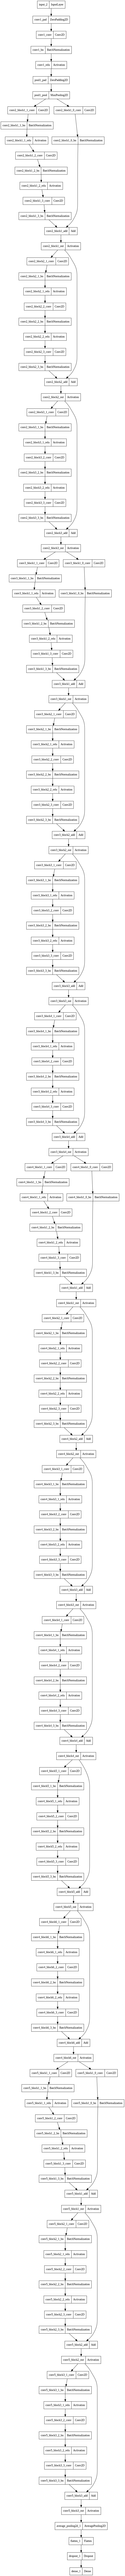

In [26]:
train_dir = "/content/drive/MyDrive/aptos2019-kaggle/train_images"
test_dir  = "/content/drive/MyDrive/aptos2019-kaggle/test_images"

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
#callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_acc', verbose=1)]
model.summary()
plot_model(model, to_file='model.png')

In [33]:
num_class = data_train.shape[1]
print(num_class)
data_train['diagnosis'] =  data_train['diagnosis'].astype(str)
data_train['diagnosis'] =  data_train['diagnosis'].astype('string')
data_train['id_code']   =  data_train['id_code'].astype(str)+'.png'
X = data_train['id_code']
Y = data_train['diagnosis']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)


2
(2929,) (733,) (2929,) (733,)
